# Stroke Prediction 

###### Our top priority in this health problem is to identify patients with a stroke.

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

##### Attribute Information

# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Load the Dataset

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task.

In [4]:
data.shape

(5110, 12)

In [5]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
data.describe

<bound method NDFrame.describe of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urba

In [7]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
data.info

<bound method DataFrame.info of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Let's find the Null values

In [10]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Fill the Null Values

In [11]:
data['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [12]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [13]:
# Fill the null values with mean of bmi
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [14]:
data['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [15]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [16]:
# Drop the id column
data.drop('id',axis=1,inplace=True)

In [17]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


<AxesSubplot:xlabel='stroke', ylabel='count'>

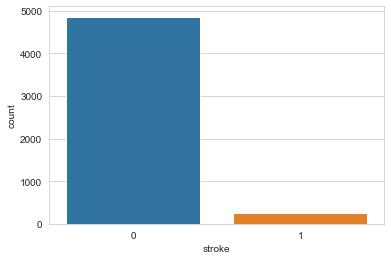

In [18]:
sns.set_style('whitegrid')
sns.countplot(data['stroke'])

<AxesSubplot:xlabel='gender', ylabel='count'>

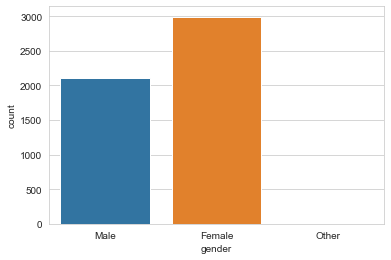

In [19]:
sns.set_style('whitegrid')
sns.countplot(data['gender'])

<AxesSubplot:xlabel='ever_married', ylabel='count'>

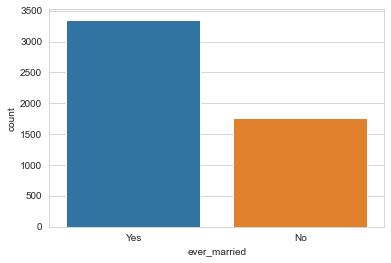

In [20]:
sns.countplot(data['ever_married'])

<AxesSubplot:xlabel='work_type', ylabel='count'>

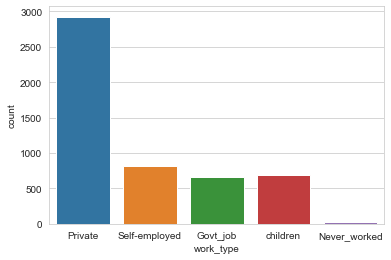

In [21]:
sns.countplot(data['work_type'])

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

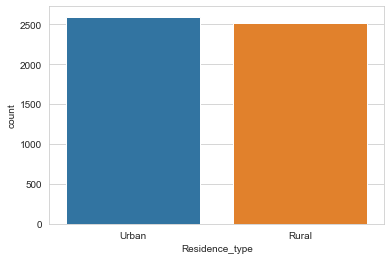

In [22]:
sns.countplot(data['Residence_type'])

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

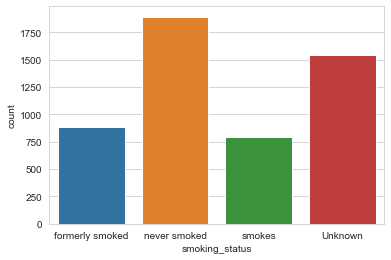

In [23]:
sns.countplot(data['smoking_status'])

In [24]:
cols = data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
cols.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.600000
1,61.0,0,0,202.21,28.893237
2,80.0,0,1,105.92,32.500000
3,49.0,0,0,171.23,34.400000
4,79.0,1,0,174.12,24.000000


### Let's see how data is distributed for every columns

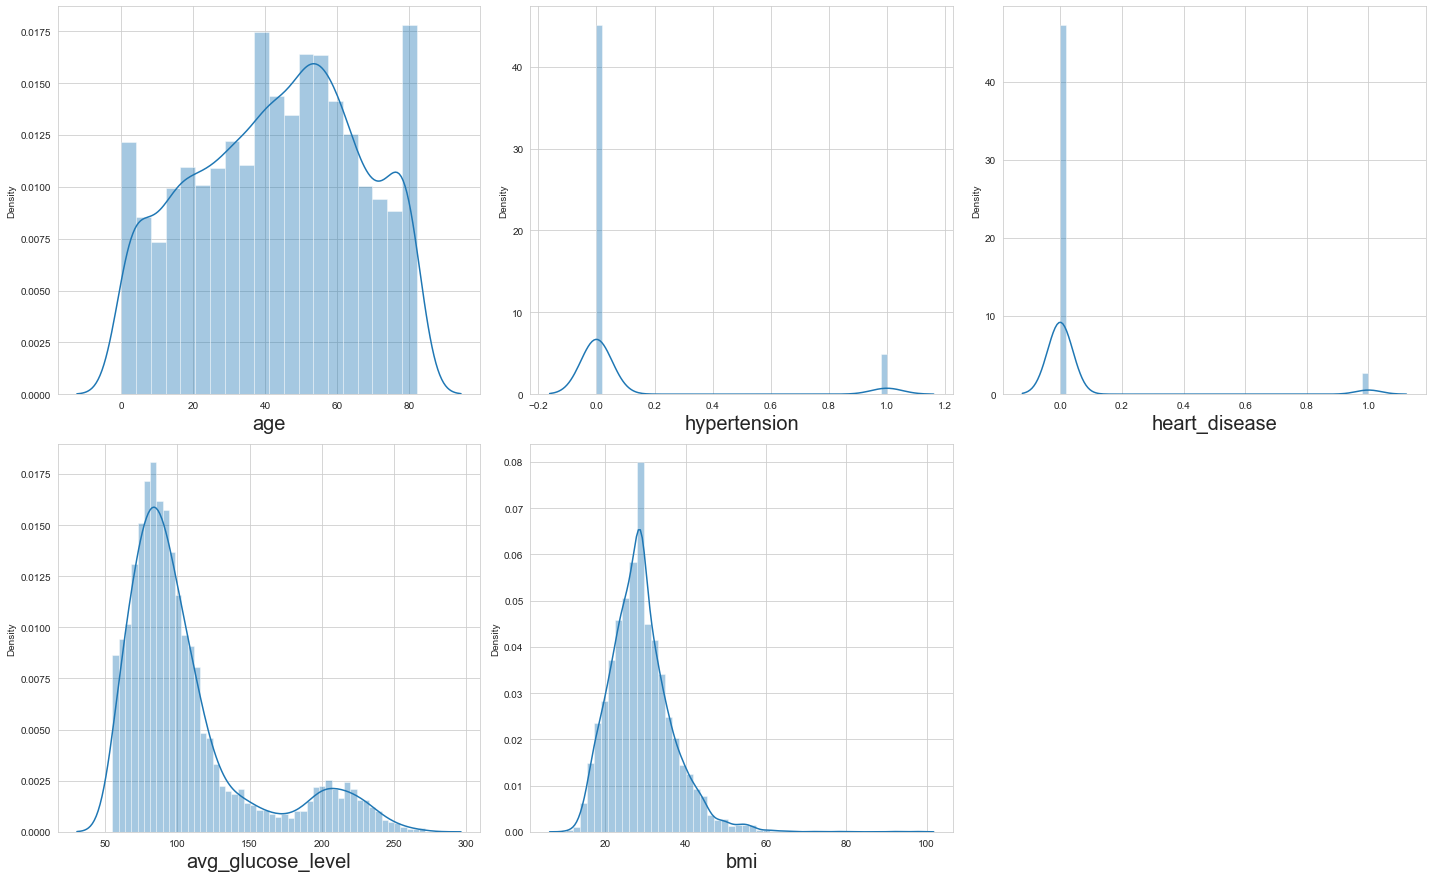

In [25]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in cols:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(cols[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

## Let's see outliers:

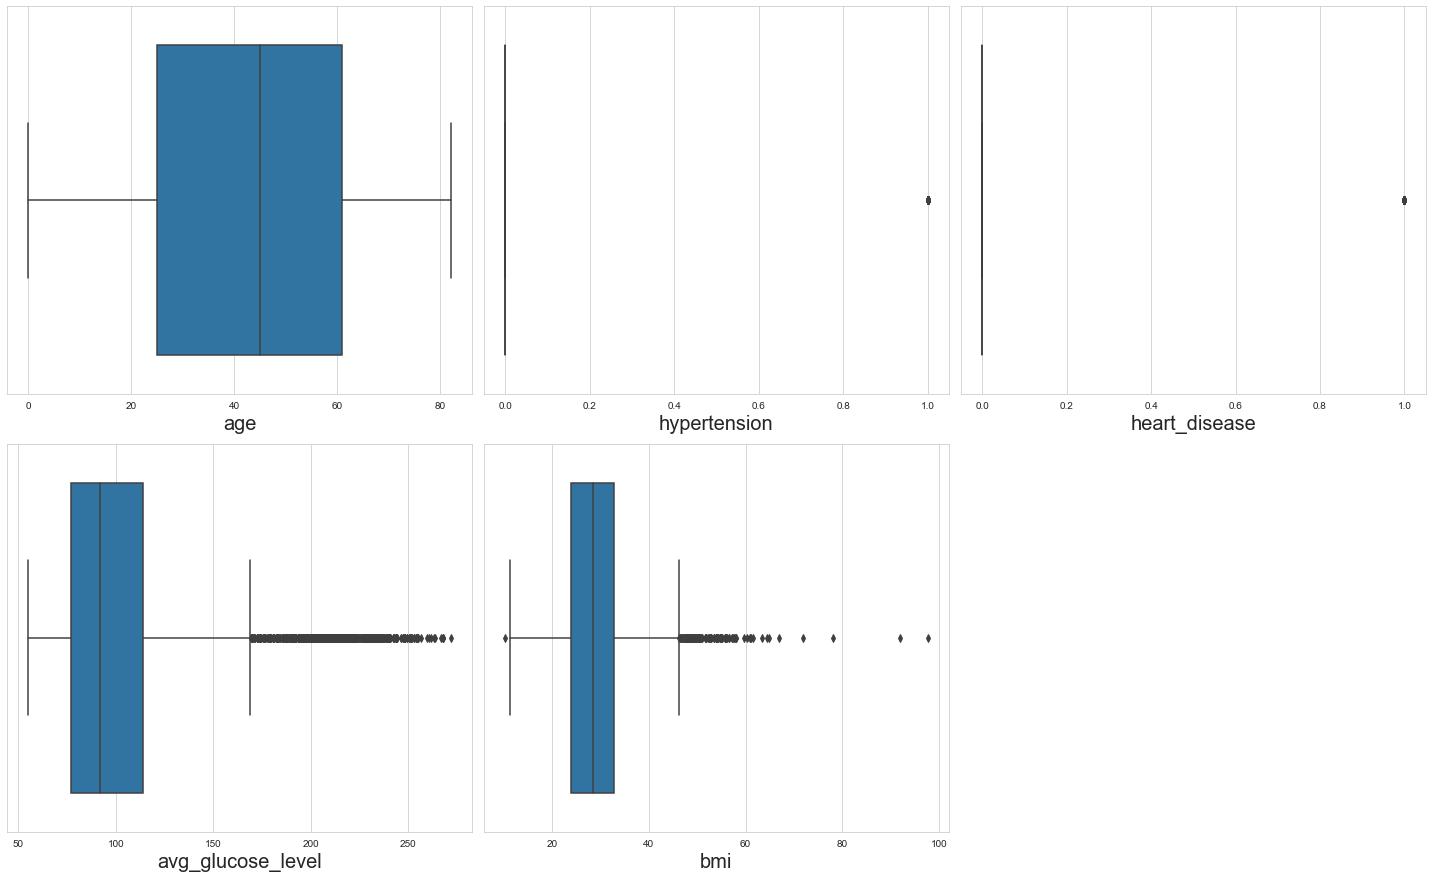

In [26]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in cols:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(cols[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

## Kde Plots:

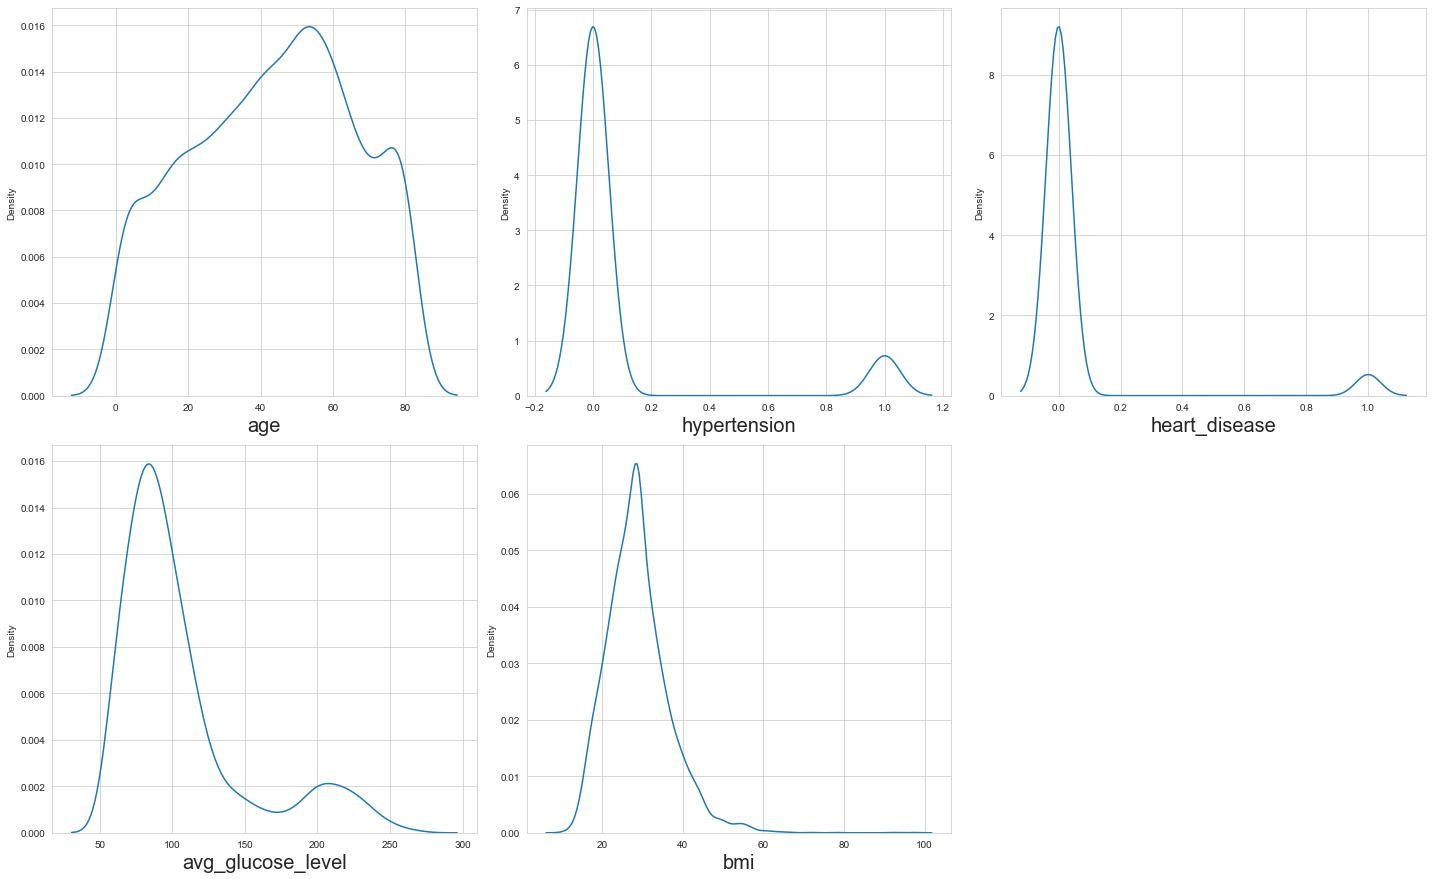

In [27]:
# lets see Kde plot
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in cols:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.kdeplot(cols[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

### Relation between categorical column and target columns:

In [28]:
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']

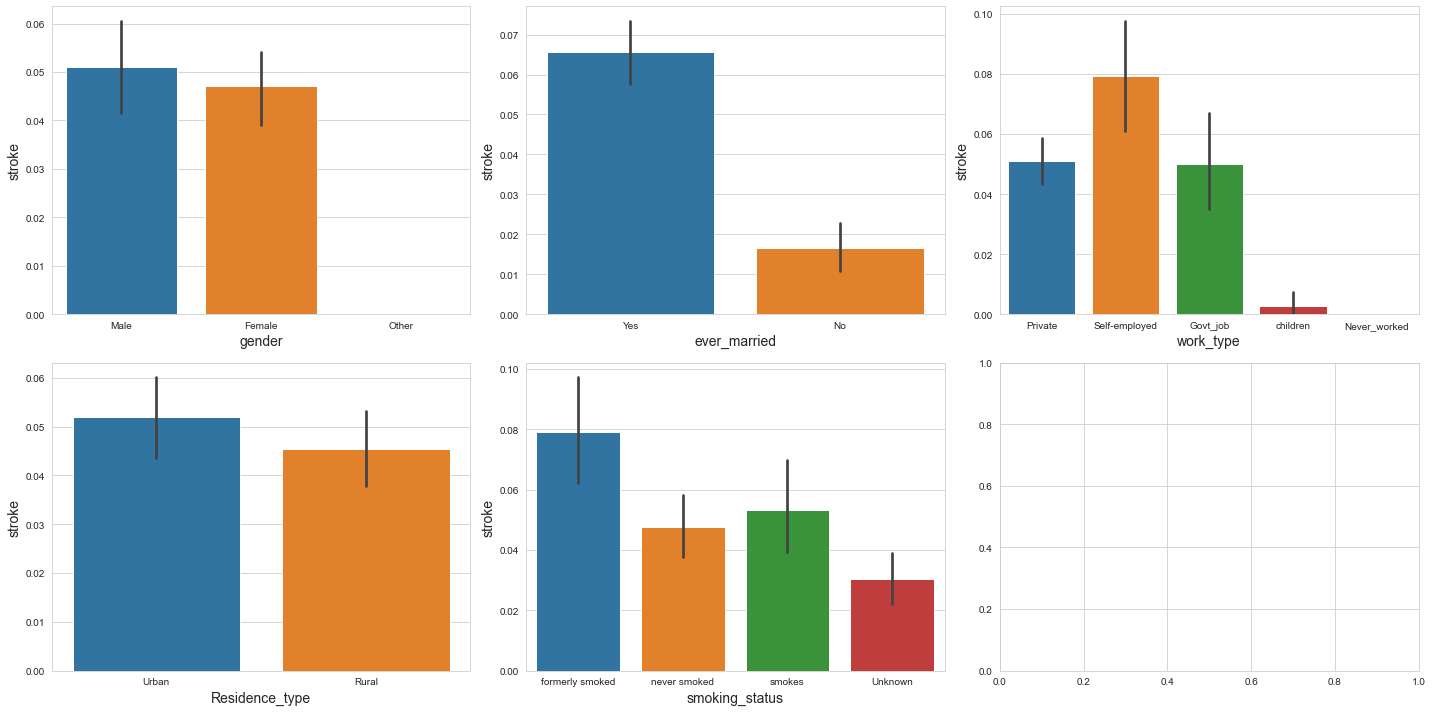

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
axes = [ax for axes_row in axes for ax in axes_row]
target = 'stroke'

for i, c in enumerate(categorical_features):
    sns.barplot(data[c], data[target], ax=axes[i])
    axes[i].set_ylabel('stroke', fontsize=14)
    axes[i].set_xlabel(c, fontsize=14)
    
plt.tight_layout()
plt.show()

## Label Encoding:

In [30]:
data.head(8)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [32]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [33]:
gender = enc.fit_transform(data['gender'])

In [34]:
ever_married = enc.fit_transform(data['ever_married'])
work_type = enc.fit_transform(data['work_type'])
Residence_type = enc.fit_transform(data['Residence_type'])
smoking_status = enc.fit_transform(data['smoking_status'])

In [35]:
data['gender']=gender
data['ever_married']=ever_married
data['work_type']=work_type
data['Residence_type']=Residence_type
data['smoking_status']=smoking_status

In [36]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


## Splitting the Data into Train and Test:

In [38]:
x = data.drop('stroke',axis=1)

In [39]:
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [40]:
y = data['stroke']

In [41]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.2,random_state=20)

In [43]:
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
323,1,53.0,0,0,1,2,0,90.12,35.4,0
152,0,80.0,0,0,1,3,1,76.57,34.1,2
3539,1,11.0,0,0,0,4,0,68.62,18.2,0
1316,0,21.0,0,0,0,2,1,134.45,29.1,2
3276,0,79.0,0,0,1,3,1,78.32,32.0,0
...,...,...,...,...,...,...,...,...,...,...
1607,1,60.0,1,0,1,2,1,197.09,34.3,0
3915,1,61.0,0,0,1,2,1,68.17,43.8,1
1428,0,57.0,0,0,1,2,0,169.97,25.8,2
4367,0,75.0,0,0,1,0,1,89.68,38.7,2


In [44]:
y_train

323     0
152     1
3539    0
1316    0
3276    0
       ..
1607    0
3915    0
1428    0
4367    0
2522    0
Name: stroke, Length: 4088, dtype: int64

In [45]:
x_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4924,1,40.0,1,0,1,3,1,93.20,24.800000,3
2218,0,57.0,0,0,1,0,1,97.39,38.000000,0
2750,0,59.0,0,0,1,3,1,90.04,28.700000,1
4907,1,55.0,0,0,1,2,0,56.87,28.900000,1
761,0,37.0,0,0,0,2,0,92.78,54.200000,2
...,...,...,...,...,...,...,...,...,...,...
3577,0,20.0,0,0,0,2,1,98.55,21.300000,2
3426,0,15.0,0,0,0,2,0,79.20,22.400000,2
4994,0,34.0,0,0,1,3,0,88.68,23.900000,2
2494,1,78.0,0,1,1,3,1,243.73,28.893237,3


In [46]:
y_test

4924    0
2218    0
2750    0
4907    0
761     0
       ..
3577    0
3426    0
4994    0
2494    0
4692    0
Name: stroke, Length: 1022, dtype: int64

## Normalization

In [47]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [48]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [49]:
x_train_std=std.fit_transform(x_train)
x_test_std=std.transform(x_test)

In [50]:
import pickle
import os

In [51]:
#scaler_path=os.path.join('C:\Users/sakshi/Downloads/Stroke Project/models/scaler.pkl')
#with open(scaler_path,'wb') as scaler_file:
   # pickle.dump(std,scaler_file)

In [52]:
x_train_std

array([[ 1.17275977,  0.42699856, -0.33115466, ..., -0.35829409,
         0.85511343, -1.2817683 ],
       [-0.85098103,  1.62270859, -0.33115466, ..., -0.65616992,
         0.68445414,  0.5859447 ],
       [ 1.17275977, -1.43299481, -0.33115466, ..., -0.8309384 ,
        -1.4028402 , -1.2817683 ],
       ...,
       [-0.85098103,  0.60414079, -0.33115466, ...,  1.39708489,
        -0.40513976,  0.5859447 ],
       [-0.85098103,  1.4012808 , -0.33115466, ..., -0.36796681,
         1.28832546,  0.5859447 ],
       [-0.85098103, -0.23728478, -0.33115466, ..., -0.48601797,
        -0.39201212,  1.5198012 ]])

In [53]:
x_test_std

array([[ 1.17275977e+00, -1.48713672e-01,  3.01973705e+00, ...,
        -2.90585046e-01, -5.36416134e-01,  1.51980120e+00],
       [-8.50981027e-01,  6.04140788e-01, -3.31154661e-01, ...,
        -1.98474365e-01,  1.19643200e+00, -1.28176830e+00],
       [-8.50981027e-01,  6.92711901e-01, -3.31154661e-01, ...,
        -3.60052768e-01, -2.44382757e-02, -3.47911803e-01],
       ...,
       [-8.50981027e-01, -4.14427011e-01, -3.31154661e-01, ...,
        -3.89950268e-01, -6.54564870e-01,  5.85944697e-01],
       [ 1.17275977e+00,  1.53413747e+00, -3.31154661e-01, ...,
         3.01858461e+00,  9.29165360e-04,  1.51980120e+00],
       [-8.50981027e-01,  7.81283014e-01, -3.31154661e-01, ...,
        -1.94297508e-01,  1.06838098e-01, -3.47911803e-01]])

## Decision- Tree Algorithm:

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [55]:
dt.fit(x_train_std,y_train)

DecisionTreeClassifier()

In [56]:
dt.feature_importances_

array([0.01445202, 0.19275269, 0.03668204, 0.03145337, 0.00620425,
       0.04617171, 0.02244105, 0.3601155 , 0.19194988, 0.09777749])

In [57]:
x_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [58]:
y_pred=dt.predict(x_test_std)

In [59]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
ac_dt=accuracy_score(y_test,y_pred)

In [62]:
ac_dt

0.9090019569471625

## Applying  Hyperparameter Tuning:

In [63]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [64]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dt,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =2, verbose=1)

In [65]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [66]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 9, 'min_samples_split': 5, 'splitter': 'random'}


In [67]:
grid_search.best_score_

0.9532785879522254

In [68]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth =14, min_samples_leaf= 2, min_samples_split= 2, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=14, min_samples_leaf=2, splitter='random')

In [69]:
ac2_clf= clf.score(x_test_std,y_test)

C:\Users\sakshi\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [70]:
ac2_clf

0.9452054794520548

## RandomForest Classification Algorithm:

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [72]:
rf.fit(x_train_std,y_train)

RandomForestClassifier()

In [73]:
rf.feature_importances_

array([0.03310993, 0.22312188, 0.02557151, 0.02391007, 0.01761022,
       0.04983058, 0.03374032, 0.29139754, 0.23169822, 0.07000971])

In [74]:
y_pred=rf.predict(x_test_std)

In [75]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
from sklearn.metrics import accuracy_score
ac_rf=accuracy_score(y_test,y_pred)

In [77]:
ac_rf

0.9452054794520548

## K-Nearest Neighbour Algorithm:

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
knn = KNeighborsClassifier(n_neighbors=13,p=2,metric='euclidean')
knn.fit(x_train_std,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [80]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [81]:
y_pred =  knn.predict(x_test)
y_pred

C:\Users\sakshi\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [83]:
print(accuracy_score(y_test,y_pred))

0.9452054794520548


## Applying Hyperparameter Tuning:

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [86]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [87]:
# fit the model on our train set
g_res = gs.fit(x_train_std, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [88]:
# find the best score
g_res.best_score_

0.9527887039078018

In [89]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'uniform'}

In [90]:
# use the best hyperparameters
knn1 = KNeighborsClassifier(n_neighbors = 13, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn1.fit(x_train_std, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=13)

In [91]:
# get a prediction
y_hat = knn1.predict(x_train_std)
y_knn = knn1.predict(x_test)

C:\Users\sakshi\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [92]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn1, x, y, cv =5)
ac_knn1 = np.mean(scores)

In [93]:
ac_knn1

0.950880626223092

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       966
           1       0.00      0.00      0.00        56

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.89      0.95      0.92      1022



C:\Users\sakshi\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sakshi\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sakshi\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

## Comaprison Bar-Plot:

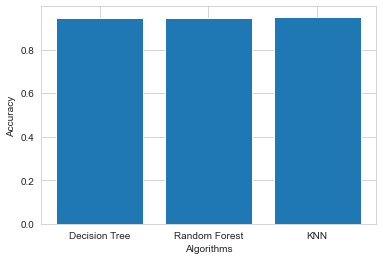

In [95]:
plt.bar(['Decision Tree','Random Forest','KNN'],[ac2_clf,ac_rf,ac_knn1])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()